In [3]:
import sys
sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.qiskit_utilities import *

from qiskit import QuantumCircuit, transpile

import math

#harmonic oscillator
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = m*b*bdag - m*bdag*b

hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
                  2**3, standard_encode)

#anharmonic oscillator
h_b_AHO = 0.5*(p*p + m*m*q*q + 2.*m*g*q*q*q*q + g*g*q*q*q*q*q*q)
h_f_AHO = 0.5*(m+3*g*q*q)*(b*bdag - bdag*b)

#hamAHO = Hamiltonian(h_b, h_f, {m:1, g:1},
#                  2**3, standard_encode)

#double well
h_b_DW = 0.5*(p*p + (m*q + g*(q*q + mu*mu))**2)
h_f_DW = -0.5*(m+2*g*q)*(b*bdag-bdag*b)

#hamDW = Hamiltonian(h_b, h_f, {m:1, g:1, mu:1},
#                  2**3, standard_encode)

In [6]:
hamHO.harmonic

0.5*a*ad + 0.5*ad*a

In [3]:
HO_circuits = {}
AHO_circuits = {}
DW_circuits = {}

cutoffs = [n for n in range(2**2, 2**5+1)]

def hamToQC(ps):
    trotterStep = pauli_string_to_trotter_step(ps,1)
    nq=int(math.ceil(math.log(n,2)))+1
    qc = QuantumCircuit(nq,nq)
    qc.append(trotterStep, [i for i in range(nq)])
    return transpile(qc, basis_gates = ['cx', 'u1', 'u2', 'u3', 'H', 'X', 'Y', 'Z'])
    

for n in cutoffs:
    ham = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
                  n, standard_encode)
    HO_circuits[n] = {'hamiltonian': ham, 'circuit': hamToQC(ham.pauliStrings)}
    
#    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
#                  n, standard_encode)
#    AHO_circuits[n] = {'hamiltonian': ham, 'circuit': hamToQC(ham.pauliStrings)}
    
    ham = Hamiltonian(h_b_DW, h_f_DW, {m:1, g:1, mu: 1},
                  n, standard_encode)
    DW_circuits[n] = {'hamiltonian': ham, 'circuit': hamToQC(ham.pauliStrings)}
    

In [4]:
HOcxCounts = [HO_circuits[n]['circuit'].count_ops().get('cx') for n in cutoffs]
#AHOcxCounts = [AHO_circuits[n]['circuit'].count_ops().get('cx') for n in cutoffs]
DWcxCounts = [DW_circuits[n]['circuit'].count_ops().get('cx') for n in cutoffs]

HOcxCounts = [0 if v is None else v for v in HOcxCounts]

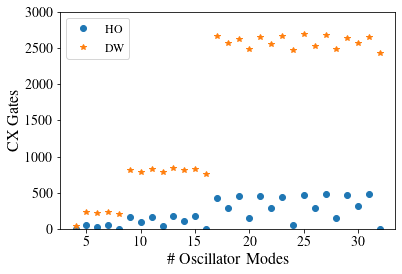

In [11]:
import matplotlib.pyplot as plt

plt.plot(cutoffs, HOcxCounts,'o',label='HO')
#plt.plot(cutoffs, AHOcxCounts,'x',label='AHO')
plt.plot(cutoffs, DWcxCounts,'*',label='DW')
plt.xlabel('\# Oscillator Modes')
plt.ylabel('CX Gates')
#plt.title('Single Trotter Step')
plt.legend(loc='upper left')
plt.ylim(-1,3000)
plt.savefig('PLOTS/gate_counts.pdf')

In [6]:
ham = AHO_circuits[4]['hamiltonian']

In [7]:
ham.pauliStrings

32.75*I^0*I^1*I^2 + 3.5*I^0*I^1*Z^2 + 14.1486483908533*I^0*I^2*X^1 - 25.75*I^0*I^2*Z^1 + 1.4488887394336*I^0*X^1*Z^2 - 1.5*I^0*Z^1*Z^2 - 13.8125*I^1*I^2*Z^0 - 0.75*I^1*Z^0*Z^2 - 8.04985240311929*I^2*X^1*Z^0 + 9.0*I^2*Z^0*Z^1 - 0.388228567653781*X^1*Z^0*Z^2

In [9]:
import pickle
pickle.dump(HO_circuits,open('DATA/ho_circuits.p','wb'))
#pickle.dump(AHO_circuits,open('DATA/aho_circuits.p','wb'))
pickle.dump(DW_circuits,open('DATA/dw_circuits.p','wb'))